<a href="https://colab.research.google.com/github/sgzavala/dsx-cs4/blob/main/beginner_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 4.1 - Movies

<h1 style="color:red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

<h1 style="color:red;">Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.</h1>

# BEGINNER PYTHON

As this is a beginner version, we include a lot of code here to help you along the way.

**First, fill in your identification information below. Then, you only have to type in the answers to the questions we ask you. For the rest of the cells, just Run them by pressing the "Run" button above.**

# Identification Information

In [ ]:
# YOUR NAME              = Sergio Gerardo Zavala Mendoza
# YOUR MITX PRO USERNAME = sg_zavala
# YOUR MITX PRO E-MAIL   = sg_zavala@icloud.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [1]:
!pip install --upgrade pip
!pip install surprise==0.1

     |████████████████████████████████| 1.5MB 2.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 11.8 MB 69 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670935 sha256=5081210dc1dc3be67710cf2dcb817a58464bc2ee52bf9ab276cacccb1ac964df
  Stored in directory: /root/.cache/pip/wheels/de/9a/41/6a57bf37eb7b50de7f8c7ca9d7053bebe0ea7c7c9bae9fa293
Successfully built scikit-surprise


If you do not see any red text, then the install was successful. Yellow text is just warnings, not errors.

Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go. If you don't see that blue indicator, then your kernel may not be working properly. If this happens, try saving your work, closing the notebook and re-opening it.

# Import

Import the required tools into the notebook.

In [2]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold
%matplotlib inline
print('\n\nImports successful!')



Imports successful!


# Data

Load the MovieLens data. A dialog may pop up saying **"Dataset ml-100k could not be found. Do you want to download it? [Y/n]"** Type Y and hit Enter to start the download process.

In [3]:
data = Dataset.load_builtin('ml-100k')
print('\n\nData load successful!')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


Data load successful!


We also want to get a sense of what the data looks like. Let's create a histogram of all the ratings we have in the dataset.



Histogram generation successful!


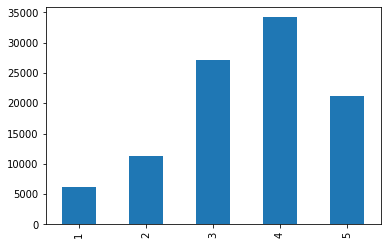

In [4]:
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file

# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# 3. Get the rating column
ratings = raw_data.rating

# 4. Generate a bar plot/histogram of that data
ratings.value_counts().sort_index().plot.bar()

print('\n\nHistogram generation successful!')

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

Se cargaron los datos correctamente.
El histograma de frecuencias muestra 5 categorías con una mayor tendencia  hacia los rating 3 4 y 5. La valoracióón 4 es la que más se otorga, en tanto la de menor frecuencia son la 1 y 2 respectivamente. Se observa una alta dispersión en los datos


# Model 1: Random

In [5]:
# Create model object
model_random = NormalPredictor()
print('\n\nModel creation successful!')



Model creation successful!


In [6]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5246  1.5187  1.5138  1.5240  1.5075  1.5177  0.0064  
Fit time          0.12    0.16    0.16    0.16    0.17    0.15    0.02    
Test time         0.21    0.13    0.20    0.13    0.20    0.17    0.03    


Model training successful!


# Model 2: User-Based Collaborative Filtering

In [7]:
# Create model object
model_user = KNNBasic(sim_options={'user_based': True})
print('\n\nModel creation successful!')



Model creation successful!


In [8]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9909  0.9734  0.9750  0.9783  0.9733  0.9782  0.0066  
Fit time          0.36    0.37    0.36    0.38    0.37    0.37    0.01    
Test time         3.52    3.47    3.57    3.49    3.55    3.52    0.04    


Model training successful!


# Model 3: Item-Based Collaborative Filtering

In [9]:
# Create model object
model_item = KNNBasic(sim_options={'user_based': False})
print('\n\nModel creation successful!')



Model creation successful!


In [10]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9735  0.9818  0.9727  0.9705  0.9738  0.9745  0.0038  
Fit time          0.55    0.58    0.58    0.57    0.56    0.57    0.01    
Test time         4.04    3.97    4.12    4.04    4.09    4.05    0.05    


Model training successful!


<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**


El Modelo 1 Random,  tiene un RMSE de 1.5177 

El Modelo 2 User-Based . .    RMSE de 0.9782 y std 0.0066

El Modelo 3 Item-Based        RMSE de  0.9745 y std 0.0038

En este caso y en mi opinión los modelos 2 y 3 son muy similares, aunque el modelo basado en Item es ligeramente mejor.
Basados  en el criterio de la Raiz del error cuadrático medio el mejor modelo es el de filtrado colaborativo basado en Items.
Los modelos 2 y 3 tienen mucho mejor desempeño que el modelo Random. intuitivamente se debe a las variaciones en la dispersión de los datos por lo que los dos úúltimos modelos tienen mejor desempeño y elagoritmo random usa cualquiera de las 5 recomendaciones al azar.



# Model 4: Matrix Factorization

In [13]:
# Create model object
model_matrix = SVD()
print('\n\nModel creation successful!')



Model creation successful!


In [12]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may take some time (2-3 minutes) to train, so please be patient
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9345  0.9309  0.9335  0.9390  0.9446  0.9365  0.0048  
Fit time          4.98    4.99    4.99    5.02    5.02    5.00    0.02    
Test time         0.14    0.24    0.14    0.14    0.22    0.18    0.05    


Model training successful!


<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

La matriz de factorización es un modelo de filtrado coalaborativo. A diferencia de los modelos usuario-usuario/ítem, que usan la similitud entre usuario o items, el modelo de la matriz de factorización utiliza la factorizacióón de bajo rango buscando las similitudes entre las preferencias de los usuarios para realizar las recomendaciones.
el RMSE para este modelo (0.9365) es significativamente mejor que en los modelos anteriores, debido a que ofrece un mayor nivel de personalización al indentificar la similitudes entre usuarios

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k). **Make sure you run this cell.**

In [14]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('\n\nFunction creation successful!')



Function creation successful!


Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

RMSE Evalua la calidad de la predicción, en tanto precisión and recall evaluan la calidad de la recomendación.
Se busca tener el menor RMSE y la mayor presicióón. Ésta última indicará el  porcentaje de veces que se hace una recomendacióón adecuada.


k=5 . .   Random . .   User . .   Item . .  Matrix

precision . . 0.588 . .0.763 . . 0.817 . . 0.783

recall . . 0.335 . . 0.454 . . 0.389 . . 0.434

k=10 . .    Random . .   User . .   Item . .  Matrix

precision . . 0.584 . . 0.740 . . 0.788 . . 0.756

recall . . 0.434 . . 0.592 . . 0.532 . . 0.560


Al igual que en los resultadoa anteriores sin integrar el modelo de Matrix, el algoritmo con el mejor predictor y mejor presición fue el  modelo colaborativo basado en el Item..
llama la atención que el modelo de Matrix aunque tiene un RSME mejor, no logra superar ni en presición ni en exaustividad al modelo basado en ITEM.

Abajo el Código y los resultados 

In [15]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for model in models:
        print(f'>>> k={k}, model={model.__class__.__name__}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> reccall  :', round(sum(r) / len(r), 3))
        print('\n')

print('\n\nPrecision and recall computation successful!')

>>> k=5, model=NormalPredictor
>>> precision: 0.588
>>> reccall  : 0.335


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.763
>>> reccall  : 0.454


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.817
>>> reccall  : 0.389


>>> k=5, model=SVD
>>> precision: 0.783
>>> reccall  : 0.43

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [16]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Function creation successful!')

Function creation successful!


Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

In [17]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
print('\n\nTrainset and testset creation successful!')



Trainset and testset creation successful!


<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

Las predicciones en los 4 modelos tienen sentido ya que en todos los casos el raiting value están entre 4.3076 y 5.
Este modelo podría entrenarse para recomendar a los clientes de una tienda en linea los productos en funcióón de las preferencias de los clientes

In [18]:
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model}, {user}: {top_n[user]}')

print('\n\nTop N computation successful!')

model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f22d34f6780>, 196: [('465', 5), ('387', 5), ('95', 5), ('246', 5), ('196', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f22d0f27160>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f22d4e67c50>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
model: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f22d460b240>, 196: [('408', 4.566293899639796), ('318', 4.558055431283207), ('169', 4.461277668865071), ('603', 4.45449898447024), ('483', 4.453644383132141)]


Top N computation successful!


<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.